In [1]:
import sys
import os

import albumentations as A
import cv2

from matplotlib import pyplot as plt
import ipyplot
from PIL import Image

import numpy as np
import pandas as pd
import random


In [2]:
# linux
!pwd

/home/pasannissanka/Projects/SignRecognition/code/notebooks


In [3]:
# windows
!cd

In [4]:
%matplotlib inline

In [5]:
# sys.path.insert(0, '..\\scripts')
sys.path.insert(0, '../scripts')

In [6]:
import extract_annotations as E
import export as EXP

## Extract Data/ Annotations

In [7]:
RAW_DATA = E.extract()

In [8]:
LABELS = RAW_DATA["labels"]
DATA = RAW_DATA['data']
print(len(DATA))
print(DATA[0])

3768
['/home/pasannissanka/Projects/SignRecognition/code/notebooks/../scripts/../data/127_png_jpg.rf.03b481ce8bb8820798baf10651385b2f.jpg', [4], [[0.50390625, 0.58515625, 0.1734375, 0.1953125, 'chevron_markers']]]


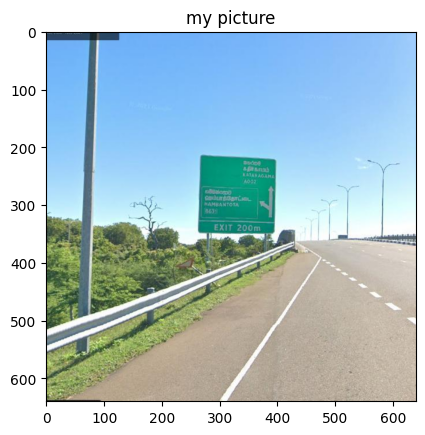

[[0.51875, 0.440625, 0.20625, 0.225, 'directional_normal']]


In [9]:
index = 50
d = DATA[index]
cl_id = d[1]
bbox_1 = d[2]

img = cv2.imread(d[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('my picture')
plt.show()

print(bbox_1)

Example tranformation

In [10]:
transform = A.Compose([
    A.RandomCrop(width=450, height=450),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='yolo'))

In [11]:
transformed = transform(image=img, bboxes=bbox_1)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']

print(transformed_bboxes)

[(0.4444444444444444, 0.5577777777777777, 0.2933333333333334, 0.31999999999999995, 'directional_normal')]


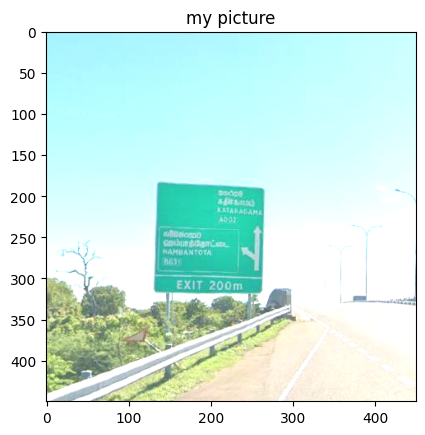

In [12]:
# View transformed image
plt.imshow(transformed_image)
plt.title('my picture')
plt.show()

original bbox		[[0.51875, 0.440625, 0.20625, 0.225, 'directional_normal']]
transformed bbox	[(0.45499999999999996, 0.5125, 0.33, 0.36, 'directional_normal')]


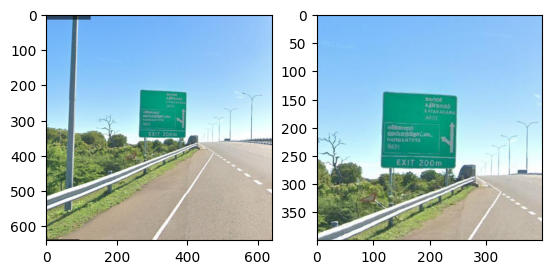

In [13]:
# define transformations
transform = A.Compose([
    A.RandomCrop(width=400, height=400),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='yolo'))


_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img)
print("original bbox\t\t{}".format(bbox_1))


# apply transformations to an image
transformed = transform(image=img, bboxes=bbox_1)

# access transformed image and labels
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
print("transformed bbox\t{}".format(transformed_bboxes))

ax2.imshow(transformed_image)

## Filter for specific classes


In [14]:
# Labels
print(len(LABELS), LABELS)

42 {0: 'T_juc_ahead', 1: 'bend_ahead', 2: 'bus_only_lane', 3: 'bus_stop', 4: 'chevron_markers', 5: 'children_crossing_ahead', 6: 'cross_roads_ahead', 7: 'cycle_lane_ahead', 8: 'cycle_only_lane', 9: 'directional_express_way', 10: 'directional_normal', 11: 'double_bend_ahead', 12: 'expressway', 13: 'give_way', 14: 'give_way_ahead', 15: 'height_limit', 16: 'hospital', 17: 'level_crossing', 18: 'level_crossing_gates_ahead', 19: 'light_signal_ahead', 20: 'merge_ahead', 21: 'no_entry', 22: 'no_horning', 23: 'no_parking', 24: 'no_turn', 25: 'no_u_turn', 26: 'one_way', 27: 'parking', 28: 'pass', 29: 'pedestrian_crossing', 30: 'pedestrian_crossing_ahead', 31: 'road_closed', 32: 'road_narrows_ahead', 33: 'road_works_ahead', 34: 'roundabout', 35: 'roundabout_ahead', 36: 'side_road', 37: 'speed_limit', 38: 'staggered_junc_ahead', 39: 'stop', 40: 'straight_ahead', 41: 'turn'}


In [15]:
# Helper functions for filtering by label id
def filter_single_img_by_label_id(label_id):
    d = []
    for data in DATA:
        if len(data[1]) == 1 and label_id in data[1]:
            d.append(data)
    return d

def filter_multiple_img_by_label_id(label_id):
    d = []
    for data in DATA:
        if len(data[1]) > 1 and label_id in data[1]:
            d.append(data)
    return d

In [16]:
# find labels that contain directions (left/right)
left_labels = []
right_labels = []

for k, v in LABELS.items():
    if "right" in v:
        print("RIGHT", k, v)
        left_labels.append(k)
    if "left" in v:
        print("LEFT", k, v)
        right_labels.append(k)
        
print("LEFT", left_labels)
print("RIGHT", right_labels)

LEFT []
RIGHT []


In [ ]:
# filter imgs with only 'left' labels
data_single_left = sum(list(map(lambda l: filter_single_img_by_label_id(l), left_labels)), [])
print(len(data_single_left))

if len(data_single_left) > 0:
    ipyplot.plot_images(list(map(lambda d: d[0], data_single_left)), img_width=100, max_images=10)

In [ ]:
# filter imgs with multiple 'left' labels
data_multi_left = sum(list(map(lambda l: filter_multiple_img_by_label_id(l), left_labels)), [])
print(len(data_multi_left))

if len(data_multi_left) > 0:
    ipyplot.plot_images(list(map(lambda d: d[0], data_multi_left)), max_images=10, img_width=100)

In [ ]:
# filter imgs with only 'right' labels

data_single_right = sum(list(map(lambda l: filter_single_img_by_label_id(l), right_labels)), [])
print(len(data_single_right))

if len(data_single_right) > 0:
    ipyplot.plot_images(list(map(lambda d: d[0], data_single_right)), img_width=100, max_images=10)

In [ ]:
# filter imgs with multiple 'right' labels

data_multi_right = sum(list(map(lambda l: filter_multiple_img_by_label_id(l), right_labels)), [])
print(len(data_multi_right))

if len(data_multi_right) > 0:
    ipyplot.plot_images(list(map(lambda d: d[0], data_multi_right)), max_images=10, img_width=100)

### Augmentations

In [ ]:
# Prepare flip transformation

transformFlip = A.Compose([
    A.HorizontalFlip(p=1),
], bbox_params=A.BboxParams(format='yolo'))

In [ ]:
imgs = list(map(lambda d: cv2.imread(d[0]), data_single_left))
imgs = list(map(lambda d: cv2.cvtColor(d, cv2.COLOR_BGR2RGB), imgs))

bboxes = list(map(lambda d: d[2], data_single_left))
print(len(imgs), len(bboxes))

In [ ]:
# Debug (RUN FOR VISUALIZATION ONLY)
imgs = list(map(lambda d: Image.fromarray(d), imgs))

# visualize
if len(imgs) > 0:
    ipyplot.plot_images(imgs, max_images=10, img_width=150)

In [ ]:
# apply transformations 
transformed_single_arr = list(map(lambda i, l: transformFlip(image=i, bboxes=l), imgs, bboxes))

In [ ]:
# transform the label
new_transformed_single_arr = []

for transformed in transformed_single_arr:
    temp = {'image': [], 'bboxes': []}
    bbox = transformed["bboxes"]
    temp['image'] = transformed['image']
    for box in bbox:
        box = list(box)
        box[4] = box[4].replace('left', 'right')
        box = tuple(box)
        temp['bboxes'].append(box)
    new_transformed_single_arr.append(temp)

In [ ]:
transformed_imgs = []
transformed_bboxs = []

#  Debug (RUN FOR VISUALIZATION ONLY)
for transformed in new_transformed_single_arr:
    img = transformed["image"]
    bbox = transformed["bboxes"]
    h,w,_ = img.shape
    for box in bbox:
        x1 = int(box[0] * w)
        y1 = int(box[1] * h)
        xw = int(box[2] * w/2)
        yw = int(box[3] * h/2)
        start_point = (x1 - xw, y1 - yw )
        end_point   = (x1 + xw, y1 + yw )
        img = cv2.rectangle(img, start_point, end_point, (255, 0, 0), 2)
        img = cv2.putText(img, box[4], (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    transformed_imgs.append(img)
    transformed_bboxs.append(bbox)

transformed_imgs = list(map(lambda d: Image.fromarray(d), transformed_imgs))


In [ ]:

# visualize
if len(transformed_imgs) > 0:
    ipyplot.plot_images(transformed_imgs, max_images=10, img_width=150)

In [ ]:
generated_dir = os.path.join(os.getcwd(), "../generated/new_1")

In [ ]:
EXP.save_to_files(new_transformed_single_arr, generated_dir, LABELS)

In [ ]:
# Helper functions for filtering by label id
def filter_single_img_by_label_id(label_id):
    d = []
    for data in DATA:
        if len(data[1]) == 1 and label_id in data[1]:
            d.append(data)
    return d

# Helper functions to flip label name
def transform_label(data, replace_from, replace_to):
    output = []
    for transformed in data:
        temp = {'image': [], 'bboxes': []}
        bbox = transformed["bboxes"]
        temp['image'] = transformed['image']
        for box in bbox:
            box = list(box)
            box[4] = box[4].replace(replace_from, replace_to)
            box = tuple(box)
            temp['bboxes'].append(box)
        output.append(temp)
    return output

In [ ]:
# helper script to create files
import export as EXP

# path to output generated dataset
generated_dir = os.path.join(os.getcwd(), "../generated/dir_transform")

# find labels that contain directions (left/right)
left_labels = []
right_labels = []

for k, v in LABELS.items():
    if "right" in v:
        left_labels.append(k)
    if "left" in v:
        right_labels.append(k)
        
# filter imgs with only 'left' labels
data_single_left = sum(list(map(lambda l: filter_single_img_by_label_id(l), left_labels)), [])

# filter imgs with only 'right' labels
data_single_right = sum(list(map(lambda l: filter_single_img_by_label_id(l), right_labels)), [])

# Prepare flip transformation
transformFlip = A.Compose([
    A.HorizontalFlip(p=1),# p=1 ensures trasformations occur for all inputs
    A.RandomBrightnessContrast(p=0.5),
], bbox_params=A.BboxParams(format='yolo'))


# prepare images and bboxes for transformation
# left
imgs_left = list(map(lambda d: cv2.imread(d[0]), data_single_left))
imgs_left = list(map(lambda d: cv2.cvtColor(d, cv2.COLOR_BGR2RGB), imgs_left))
bboxes_left = list(map(lambda d: d[2], data_single_left))

# right
imgs_right = list(map(lambda d: cv2.imread(d[0]), data_single_right))
imgs_right = list(map(lambda d: cv2.cvtColor(d, cv2.COLOR_BGR2RGB), imgs_right))
bboxes_right = list(map(lambda d: d[2], data_single_right))

# apply transformations 
_transformed_l = list(map(lambda i, l: transformFlip(image=i, bboxes=l), imgs_left, bboxes_left))
_transformed_r = list(map(lambda i, l: transformFlip(image=i, bboxes=l), imgs_left, bboxes_left))

# transform the label
transformed_left = transform_label(_transformed_l, "left", "right")
transformed_right = transform_label(_transformed_r, "right", "left")

# save output to files
EXP.save_to_files(transformed_left, generated_dir, LABELS)
EXP.save_to_files(transformed_right, generated_dir, LABELS)

## Transform to pandas dataframe

In [ ]:
# SUPPORT FUNCTIONS

def get_path_values_by_id(dataf, id):
    path = dataf.T[id]["path"]
    print(path)
    val = dataf.loc[df["path"] == path]
    print(val)
    

In [ ]:
DATA[23][2]

In [ ]:
BBOX_DATA = []
for D in DATA:
    for coord in D[2]:
        BBOX = np.concatenate((np.array(D[0]),np.array(coord, object)), axis=None)
        BBOX_DATA.append(BBOX)
    

In [ ]:
BBOX_DATA = np.array(BBOX_DATA)

In [ ]:
BBOX_DATA.shape

In [ ]:
BBOX_X = BBOX_DATA.T[0]
BBOX_Y = BBOX_DATA.T[1]

In [ ]:
print(BBOX_X.shape, BBOX_Y.shape)

In [ ]:
BBOX_DATA

In [ ]:
df = pd.DataFrame(BBOX_DATA, columns = ['path','norm_x_center','norm_y_center', 'norm_width', 'norm_height', 'label' ])
df

In [ ]:
df.describe()

In [ ]:
df["norm_area"] = df["norm_width"] * df["norm_height"]

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df['norm_area'].plot(kind='kde')


In [ ]:
df.groupby('label').norm_area.hist()

In [ ]:
df_sort_area = df.sort_values(by=["norm_area"])
df_sort_area.head(50)

In [ ]:
df_area_sm = df.loc[df["norm_area"] <= 0.001]
print(len(df_area_sm))
df_area_sm

In [ ]:
get_path_values_by_id(df, 24)

In [ ]:
df.loc[df["path"] == 'D:\\Personal\\sign_recognition\\notebooks\\..\\scripts\\../data\\011_png.rf.4c7c39a77fad2227709d50a7311e72eb.jpg']

In [ ]:
# filter by small bbox and single signs

df_area = df.loc[df["norm_area"] <= 0.001]
for idx, row in df_area.iterrows():
    df_same_img = df.loc[df["path"] == row["path"]]
    if len(df_same_img) == 1:
        print(row["path"])

In [ ]:
# multiple imgs with same area range


def area_range(_df, area):
    d = []
    df_area = _df.loc[_df["norm_area"] <= area]
    for idx, row in df_area.iterrows():
        df_same_img = _df.loc[_df["path"] == row["path"]]
        if len(df_same_img) == 1:
            d.append(row)
        else:
            if (df_same_img['norm_area'] <= area).all():
                d.append(row)
            
    return pd.DataFrame(d)

In [ ]:
df_sml_multi = area_range(df,0.005)
df_sml_multi

In [ ]:
df_sml_multi.describe()

In [ ]:
df_sml_multi.T[265]["path"]

In [ ]:
df_sml_multi.sample()

In [ ]:
sml_multi_imgs = df_sml_multi["path"].drop_duplicates()

In [ ]:
sml_multi_imgs

In [ ]:
sml_multi_imgs.describe()

In [ ]:
DATA

In [ ]:
data_obj = []
for idx, path in sml_multi_imgs.iteritems():
    for d in DATA:
        if d[0] == path:
            data_obj.append(d)

In [ ]:

imgs_sml_multi = list(map(lambda d: cv2.imread(d[0]), data_obj))
imgs_sml_multi = list(map(lambda d: cv2.cvtColor(d, cv2.COLOR_BGR2RGB), imgs_sml_multi))

bboxes_sml_multi = list(map(lambda d: d[2], data_obj))
print(len(imgs_sml_multi), len(bboxes_sml_multi))

In [ ]:

if len(data_obj) > 0:
    ipyplot.plot_images(list(map(lambda d: d[0], data_obj)), img_width=150, max_images=10)

In [ ]:
transformCrop= A.Compose([
    A.RandomResizedCrop(480, 480, ratio=(1,1), scale=(0.02, 1.0)),
    A.Resize(640, 640, always_apply=True)
], bbox_params=A.BboxParams(format='yolo'))

In [ ]:
random.choice(bboxes_sml_multi[0])[:2]

In [ ]:
transformed_sml_multi = list(
    map(lambda i, l: 
        transformCrop(
            image=i,
            bboxes=l,
        ),
        imgs_sml_multi,
        bboxes_sml_multi
       )
)

In [ ]:
transformed_imgs = []
transformed_bboxs = []

#  Debug
for transformed in transformed_sml_multi:
    img = transformed["image"]
    bbox = transformed["bboxes"]
    h,w,_ = img.shape
    
    for box in bbox:
        x1 = int(box[0] * w)
        y1 = int(box[1] * h)
        xw = int(box[2] * w/2)
        yw = int(box[3] * h/2)
        start_point = (x1 - xw, y1 - yw )
        end_point   = (x1 + xw, y1 + yw )
        img = cv2.rectangle(img, start_point, end_point, (255, 0, 0), 2)
        img = cv2.putText(img, box[4], (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    transformed_imgs.append(img)
    transformed_bboxs.append(bbox)

transformed_imgs = list(map(lambda d: Image.fromarray(d), transformed_imgs))


In [ ]:
# visualize
if len(transformed_imgs) > 0:
    ipyplot.plot_images(transformed_imgs, max_images=10, img_width=150)

In [ ]:
generated_dir = os.path.join(os.getcwd(), "../generated/2")

In [ ]:
filt_transformed_sml_multi = []
for item in transformed_sml_multi:
    if len(item["bboxes"]) != 0:
        filt_transformed_sml_multi.append(item)
        
print(len(filt_transformed_sml_multi))

In [ ]:
EXP.save_to_files(filt_transformed_sml_multi, generated_dir, LABELS)

## Apply Transformations to all examples

In [10]:
trasformation = A.Compose([
#     A.RandomSizedBBoxSafeCrop(height=620, width=620,),
    A.MotionBlur(blur_limit=17, p=0.1),
    A.RandomRain(brightness_coefficient=0.3, drop_width=1, blur_value=1, p=0.1),
    A.RandomSunFlare(flare_roi=(0, 0, 0.1, 0.2), angle_lower=0.1, p=0.1),
    A.RandomFog(fog_coef_lower=0.7, fog_coef_upper=0.8, alpha_coef=0.1, p=0.1),
],  bbox_params=A.BboxParams(format='yolo'))

In [11]:

imgs_all = list(map(lambda d: cv2.imread(d[0]), DATA[:100]))
imgs_all = list(map(lambda d: cv2.cvtColor(d, cv2.COLOR_BGR2RGB), imgs_all))

bboxes_all = list(map(lambda d: d[2], DATA[:100]))
print(len(imgs_all), len(bboxes_all))

100 100


In [12]:
transformedAll = list(map(lambda i, l: trasformation(image=i,bboxes=l,),imgs_all,bboxes_all))

In [13]:
def visualize_transformed(transformed):    
    transformed_imgs = []
    transformed_bboxs = []

    #  Debug
    for t in transformed:
        img = t["image"]
        bbox = t["bboxes"]
        h,w,_ = img.shape

        for box in bbox:
            x1 = int(box[0] * w)
            y1 = int(box[1] * h)
            xw = int(box[2] * w/2)
            yw = int(box[3] * h/2)
            start_point = (x1 - xw, y1 - yw )
            end_point   = (x1 + xw, y1 + yw )
            img = cv2.rectangle(img, start_point, end_point, (255, 0, 0), 2)
            img = cv2.putText(img, box[4], (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

        transformed_imgs.append(img)
        transformed_bboxs.append(bbox)

    transformed_imgs = list(map(lambda d: Image.fromarray(d), transformed_imgs))
    if len(transformed_imgs) > 0:
        ipyplot.plot_images(transformed_imgs, max_images=20, img_width=150)


In [ ]:
visualize_transformed(transformed=transformedAll)

/home/pasannissanka/Projects/SignRecognition/code/venv/lib/python3.10/site-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))


In [21]:
filt_transformedAll = []
for item in transformedAll:
    if len(item["bboxes"]) != 0:
        filt_transformedAll.append(item)
        
print(len(filt_transformedAll))

3406


In [22]:
generated_dir = os.path.join(os.getcwd(), "../generated/7")
EXP.save_to_files(filt_transformedAll, generated_dir, LABELS)